# 🛠️ Cleaning Orders & Customers Data
- Remove duplicates
- Handle missing values
- Convert date formats


In [ ]:
import pandas as pd

# Load Dataset
df_orders = pd.read_csv("orders.csv")
df_customers = pd.read_csv("customers.csv")

# Convert relevant columns to datetime format

df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"])
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"])
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"])
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"])

# Function to check dataset summary
def check_dataset(df, name):
    print("\n" + "=" * 60)
    print(f"Dataset Summary: {name}")
    print("=" * 60)

    print(f"\n🔹 Missing Values:\n{df.isnull().sum()}")
    print(f"\n🔹 Duplicate Rows: {df.duplicated().sum()}")
    
    print("\n🔹 Dataset Info:")
    df.info()
    
    print("\n🔹 Statistical Summary:")
    print(df.describe())


# Check orders dataset
check_dataset(df_orders, "Orders")

# Checking Null Values where order_status == "shipped"
shipped_missing = df_orders[df_orders["order_status"] == "shipped"].isnull().sum()
print("\nMissing values in 'shipped' orders:")
print(shipped_missing)

# Fill missing "order_delivered_customer_date" with "order_estimated_delivery_date" only for shipped orders
df_orders.loc[(df_orders["order_status"] == "shipped") & 
              (df_orders["order_delivered_customer_date"].isnull()), 
              "order_delivered_customer_date"] = df_orders["order_estimated_delivery_date"]

# Re-check missing values to confirm they are correctly filled
shipped_missing_after = df_orders[df_orders["order_status"] == "shipped"].isnull().sum()
print("\nMissing values in 'shipped' orders after filling:")
print(shipped_missing_after)

# Upload cleaned "df_orders" into "cleaned_orders.csv"
df_orders.to_csv("cleaned_orders.csv", index= False)

print("\n" + "-" * 60)

# Check customers dataset
check_dataset(df_customers, "Customers")

# Upload cleaned "df_customers" into "cleaned_customer.csv"
df_customers.to_csv("cleaned_customers.csv", index= False)

print("\n" + "-" * 60)


# 🛠️ Cleaning Order_items & Payments Data
- Remove duplicates
- Handle missing values
- Convert date formats

In [ ]:
import pandas as pd

# Load datasets
df_order_items = pd.read_csv("order_items.csv")
df_payment = pd.read_csv("payments.csv")

# Convert relevant column to datetime format
df_order_items["shipping_limit_date"] = pd.to_datetime(df_order_items["shipping_limit_date"])

# Function to check dataset summary
def check_dataset(df, name):
    print("=" * 60)
    print(f"Dataset Summary: {name}")
    print("=" * 60)

    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nDuplicate Rows:", df.duplicated().sum())

    print("\nDataset Info:")
    df.info()

    print("\nStatistical Summary:")
    print(df.describe())


# Check order_items dataset
check_dataset(df_order_items, "Order Items")

# Upload cleaned "df_order_items" into "cleaned_order_items.csv"
df_order_items.to_csv("cleaned_order_items.csv", index= False)

print("\n" + "-" * 60)

# Check payment dataset
check_dataset(df_payment, "Payments")

# Upload cleaned "df_payment" into "cleaned_payments.csv"
df_payment.to_csv("cleaned_payments.csv", index= False)

print("\n" + "-" * 60)


# 🛠️ Cleaning Order_reviews & Products Data
- Remove duplicates
- Handle missing values
- Convert date formats

In [ ]:
import pandas as pd

# Load Dataset
df_order_reviews = pd.read_csv("order_reviews.csv", encoding= "latin1")
df_products = pd.read_csv("products.csv")

# Convert relevant columns to datetime format
df_order_reviews["review_creation_date"] = pd.to_datetime(
    df_order_reviews["review_creation_date"], format="%d/%m/%y %H:%M", errors="coerce"
)

df_order_reviews["review_answer_timestamp"] = pd.to_datetime(
    df_order_reviews["review_answer_timestamp"], format="%d/%m/%y %H:%M", errors="coerce"
)


# Function to check dataset summary
def check_dataset(df, name):
    print("=" * 60)
    print(f"Dataset Summary: {name}")
    print("=" * 60)

    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nDuplicate Rows:", df.duplicated().sum())

    print("\nDataset Info:")
    df.info()

    print("\nStatistical Summary:")
    print(df.describe())

  

# Check order_reviews dataset
check_dataset(df_order_reviews, "Order Reviews")

# Fill missing values in "review_comment_title" with "No Title"
df_order_reviews["review_comment_title"] = df_order_reviews["review_comment_title"].fillna("No Title")

# Re-check missing values to confirm they are correctly filled
print(df_order_reviews.isnull().sum())

# Check duplicate value in "review_id"
print(df_order_reviews.duplicated(subset= ["review_id"]).sum())

# Drop duplicate value from "review_id"
df_order_reviews = df_order_reviews.drop_duplicates(subset= ["review_id"])

# Re-check duplicate value to verify that it removed 
print(df_order_reviews.duplicated(subset= ["review_id"]).sum())

# Upload cleaned "df_order_reviews" into "cleaned_order_reviews.csv"
df_order_reviews.to_csv("cleaned_order_reviews.csv", index= False)


print("\n" + "-" * 60 + "\n")

# Check product dataset
check_dataset(df_products, "Product")


# Fill missing values in 'product_category' with the most frequent category (mode)
df_products["product_category"] = df_products["product_category"].fillna(df_products["product_category"].mode()[0])

# Display category counts to identify categories with few entries
print(df_products["product_category"].value_counts())

# Define a threshold for "small" categories
threshold = 10  
category_counts = df_products["product_category"].value_counts()

# Get list of categories with sufficient data
valid_categories = category_counts[category_counts >= threshold].index

# Fill missing values category-wise where enough data exists
for col in ["product_name_length", "product_description_length", "product_photos_qty",
            "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]:
    df_products.loc[df_products["product_category"].isin(valid_categories), col] = \
        df_products.groupby("product_category")[col].transform("median")

# Fill remaining missing values with overall median
for col in ["product_name_length", "product_description_length", "product_photos_qty",
            "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]:
    df_products[col] = df_products[col].fillna(df_products[col].median())

# Re-check the missing values to confirm that they are correctly filled
print(df_products.isnull().sum())

# Upload cleaned "df_products" into "cleaned_products.csv"
df_products.to_csv("cleaned_products.csv", index= False)

print("\n" + "-" * 60 + "\n")






# 🛠️ Cleaning geolocation & sellers Data
- Remove duplicates
- Handle missing values
- Convert date formats

In [ ]:
import pandas as pd
import numpy as np
import re
import unidecode

# Load datasets

df_sellers = pd.read_csv("sellers.csv")
df_geolocation = pd.read_csv("geolocation.csv", encoding="utf-8")

# Function to clean city names
def clean_city_name(city):
    if pd.isna(city): 
        return np.nan  # Keep NaNs
    
    city = city.lower().strip()  # Remove spaces & lowercase
    city = unidecode.unidecode(city)  # Normalize accents first
    city = re.sub(r"[^a-z\s]", "", city)  # Remove special characters (keep spaces)
    city = re.sub(r"\s+", " ", city)  # Normalize multiple spaces
    return city.strip()

# Apply cleaning
df_geolocation["geolocation_city"] = df_geolocation["geolocation_city"].apply(clean_city_name)

# Function to check dataset summary
def check_dataset(df, name):
    print("=" * 60)
    print(f"Dataset Summary: {name}")
    print("=" * 60)
    
    print(f"\n🔹 Missing Values:\n{df.isnull().sum()}")
    print(f"\n🔹 Duplicate Rows: {df.duplicated().sum()}")
    
    print("\n🔹 Dataset Info:")
    df.info()
    
    print("\n🔹 Statistical Summary:")
    print(df.describe())


# Check geolocation dataset
check_dataset(df_geolocation, "Geolocation")

# Remove duplicate data
df_geolocation = df_geolocation.drop_duplicates(keep="first")

# Confirm removal of duplicate data
print(f"\nDuplicate rows after cleaning: {df_geolocation.duplicated().sum()}")

# check duplicate data in subset
subset_duplicates = df_geolocation[df_geolocation.duplicated(subset=["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"], keep=False)]
print(subset_duplicates)

# Drop duplicate data 
df_geolocation = df_geolocation.drop_duplicates(subset=["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"], keep="first")

# Re-check duplicate to verify that duplicate data removed
subset_duplicates = df_geolocation[df_geolocation.duplicated(subset=["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng"], keep=False)]
print(subset_duplicates)

# Upload cleaned "df_geolocation" into "cleaned_geolocation.csv"
df_geolocation.to_csv("cleaned_geolocation.csv", index= False)

print("\n" + "-" * 60)

# Check sellers dataset
check_dataset(df_sellers, "Sellers")

# Upload cleaned "df_sellers" into "cleaned_sellers.csv"
df_sellers.to_csv("cleaned_sellers.csv", index= False)

print("\n" + "-" * 60)


### Uploading Data Into MySQl

In [ ]:
import pandas as pd
import mysql.connector
import os
from dotenv import load_dotenv

load_dotenv()

# List of CSV files and their corresponding table names
csv_files = [
    ('cleaned_customers.csv', 'customers'),
    ('cleaned_orders.csv', 'orders'),
    ('cleaned_sellers.csv', 'sellers'),
    ('cleaned_products.csv', 'products'),
    ('cleaned_order_items.csv', 'order_items'),
    ('cleaned_payments.csv', 'payments'),
    ('cleaned_geolocation.csv', 'geolocation'),
    ('cleaned_order_reviews.csv', 'order_reviews')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host= os.getenv("DB_HOST"),
    user= os.getenv("DB_USER"),
    password= os.getenv("DB_PASSWORD"),
    database= os.getenv("DB_NAME")
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:/E_Commerce_Project'

# Function to determine SQL data type
def get_sql_type(column_name, dtype):
    if "geolocation_lat" in column_name or "geolocation_lng" in column_name:
        return 'DECIMAL(18,15)'  # High precision for latitude & longitude
    elif pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'DECIMAL(10,2)'  # General decimal format for prices, weights, etc.
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'VARCHAR(50)'  # Default VARCHAR

# Process each CSV file
for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL values
    df = df.where(pd.notnull(df), None)

    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names to match MySQL naming conventions
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Convert ENUM columns to lowercase and validate values
    if 'order_status' in df.columns:
        df['order_status'] = df['order_status'].str.lower().str.strip()
        valid_status = {'delivered', 'invoiced', 'shipped', 'processing', 'unavailable', 'canceled', 'created', 'approved'}
        df = df[df['order_status'].isin(valid_status)]  # Remove invalid values

    if 'payment_type' in df.columns:
        df['payment_type'] = df['payment_type'].str.lower().str.strip()
        valid_payment = {'credit_card', 'upi', 'voucher', 'debit_card', 'not_defined'}
        df = df[df['payment_type'].isin(valid_payment)]

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        
        try:
            cursor.execute(sql, values)
        except mysql.connector.Error as err:
            print(f"Error inserting into {table_name}: {err}")
    
    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()
print("✅ Data Upload Completed Successfully!")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import os
from dotenv import load_dotenv

load_dotenv()

mydb = mysql.connector.connect(host = os.getenv("DB_HOST"),
                               user = os.getenv("DB_USER"),
                               password = os.getenv("DB_PASSWORD"),
                               database = os.getenv("DB_NAME"))

cur = mydb.cursor()

## LIST ALL UNIQUE CITIES WHERE CUSTOMERS ARE LOCATED

In [4]:
query = """SELECT DISTINCT customer_city
FROM customers""" 

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["customer city"])

print(df.head(10))

    customer city
0          osasco
1     itapecerica
2    nova venecia
3        mendonca
4       sao paulo
5        valinhos
6         niteroi
7  rio de janeiro
8            ijui
9        oliveira


## COUNT THE NUMBER OF ORDERS PLACED IN 2017

In [4]:
query = """SELECT COUNT(*) AS total_orders
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2017""" 

cur.execute(query)

data = cur.fetchall()

print(f"total orders placed in 2017 are : {data[0][0]}")

total orders placed in 2017 are : 45101


### COUNT NUMBER OF ORDERS CANCALED

In [39]:
query = """SELECT COUNT(*) AS total_cancel FROM orders WHERE order_status = "canceled";"""

cur.execute(query)

data = cur.fetchall()

print(f"Total Orders Canceled : {data[0][0]}")

Total Orders Canceled : 625


### AVERAGE DAY TAKEN TO DELIVARY A ORDER

In [41]:
query = """SELECT ROUND(AVG(DATEDIFF(order_delivered_customer_date,order_purchase_timestamp)), 0) AS avg_day
FROM orders
WHERE order_delivered_customer_date IS NOT NULL;
"""

cur.execute(query)

data = cur.fetchall()

print(f"Avg Day Taken to Delivery : {data[0][0]}")

Avg Day Taken to Delivery : 13


## FIND TOTAL SALES PER CATEGORY

In [6]:
query = """WITH payment_data AS (SELECT oi.product_id, SUM(p.payment_value) AS sales
FROM payments AS p
JOIN order_items AS oi ON p.order_id = oi.order_id
GROUP BY oi.product_id)

SELECT LOWER(product_category) AS category, SUM(sales) AS sales
FROM payment_data AS pd
JOIN products AS p ON p.product_id = pd.product_id
GROUP BY product_category;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["category","sales"])

print(df.head(10))

               category       sales
0             perfumery   506738.66
1            automotive   852294.33
2        bed table bath  1965355.38
3            housewares  1094758.13
4       watches present  1429216.68
5            cool stuff   779698.00
6        games consoles   195480.38
7  furniture decoration  1430176.39
8         health beauty  1657373.12
9      fashion calcados    32422.74


### CALCULATE THE DELIVERY DELAY PERCENTAGE

In [42]:
query = """SELECT CONCAT(ROUND((COUNT(*) / (SELECT COUNT(*) FROM orders)) * 100, 2),"%") AS late_deliveries
FROM orders
WHERE order_delivered_customer_date > order_estimated_delivery_date;"""


cur.execute(query)

data = cur.fetchall()

print(f"Percentage of Delay : {data[0][0]}")

Percentage of Delay : 7.87%


### CALCULATE THE PERCENTAGE OF ORDERS THAT WERE PAID THROUGH CREDIT-CARD

In [7]:
query = """SELECT CONCAT(ROUND(((SELECT COUNT(payment_type) FROM payments WHERE payment_type = "credit_card")/ COUNT(*)) * 100,2),"%") AS percentage
FROM payments"""

cur.execute(query)

data = cur.fetchall()

print(f"Percentage of credit-card payments : {data[0][0]}")


Percentage of credit-card payments : 73.92%


## CALCULATE NUMBER OF CUSTOMERS IN EACH CITY

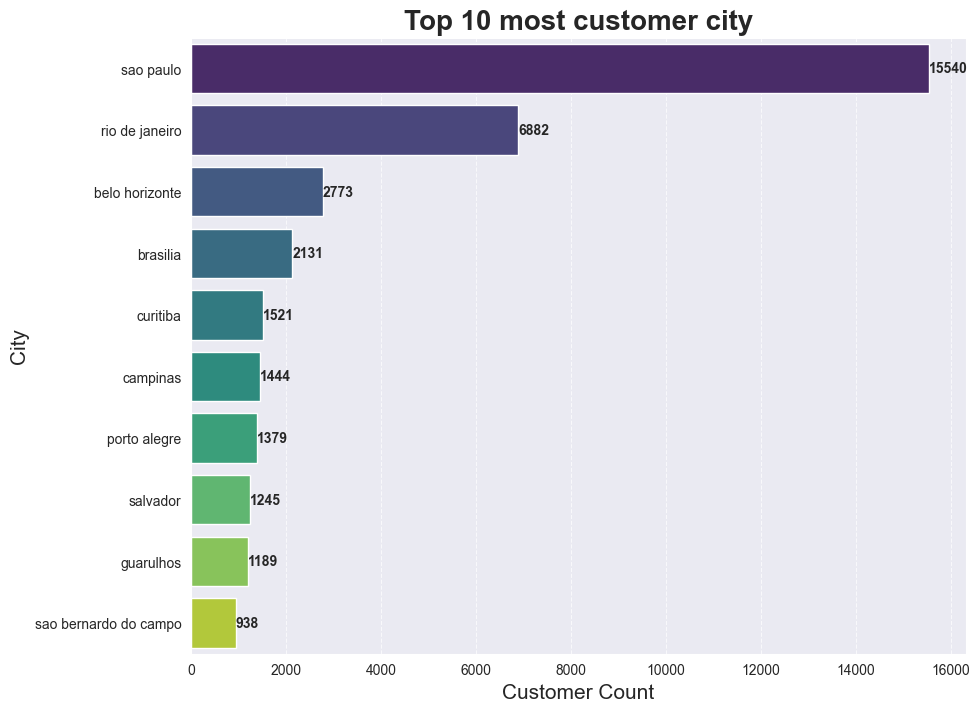

In [26]:
query = """SELECT customer_city AS city, COUNT(customer_id) AS customer_count
FROM customers
GROUP BY customer_city"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["city", "customer_count"])

df = df.sort_values("customer_count", ascending= False).head(10)

plt.figure(figsize= (10,8))

sns.set_style("dark")

ax = sns.barplot(x = "customer_count", y = "city" , data = df, orient = "h", hue = "city", palette= "viridis")

for container in ax.containers:
    plt.bar_label(container, fmt = "%d", label_type= "edge", weight = "bold")

plt.xlabel("Customer Count", fontsize = 15)
plt.ylabel("City", fontsize = 15)
plt.title("Top 10 most customer city", fontsize = 20, fontweight = "bold")

plt.grid(axis= "x", linestyle = "--", alpha = 0.7)

plt.show()

## CALCULATE THE NUMBER OF ORDERS PER MONTH IN 2018

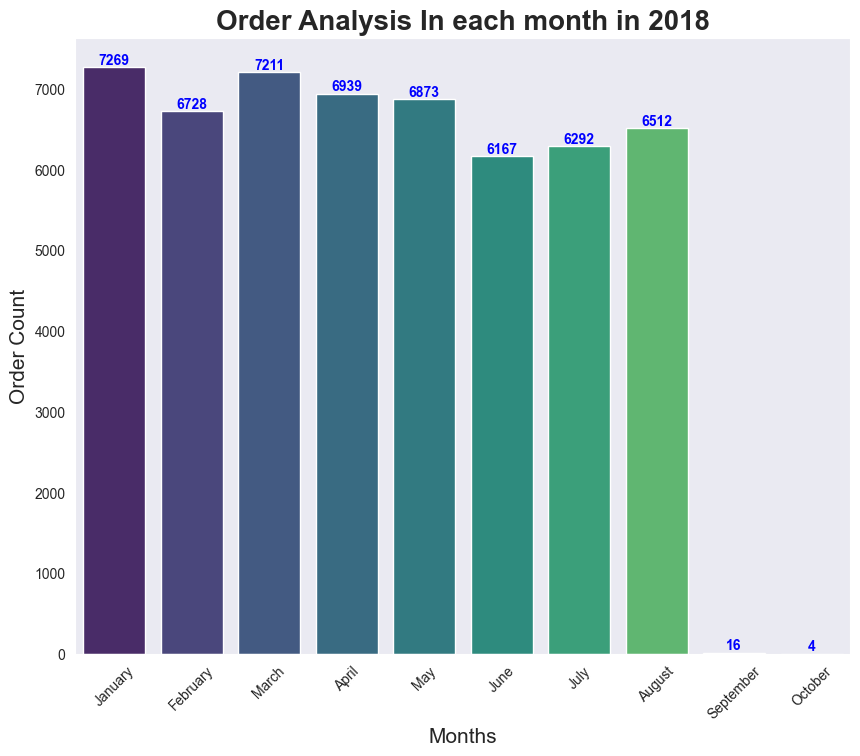

In [24]:
query = """SELECT MONTH(order_purchase_timestamp) AS month_number,MONTHNAME(order_purchase_timestamp) AS  months, COUNT(order_id) AS order_count
FROM orders
WHERE YEAR(order_purchase_timestamp)  = 2018
GROUP BY month_number,months
ORDER BY month_number;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["month_number","months", "order_count"])

df = df[["months","order_count"]]

plt.figure(figsize = (10,8))

sns.set_style("dark")

ax = sns.barplot(x = "months", y = "order_count", data = df, hue = "months", palette = "viridis", legend= False)

for container in ax.containers:
    ax.bar_label(container, fmt= "%d", label_type= "edge", fontsize = 10, color = "b", weight = "bold")

plt.xticks(rotation = 45)
plt.xlabel("Months", fontsize = 15)
plt.ylabel("Order Count", fontsize = 15)
plt.title("Order Analysis In each month in 2018", fontsize = 20, fontweight = "bold")

plt.show()

### FIND THE AVERAGE NUMBER OF PRODUCTS PER ORDER, GROUPED BY CUSTOMER CITY


In [23]:
query = """WITH count_per_order AS(
SELECT o.order_id,o.customer_id, COUNT(oi.order_id) AS oc
FROM orders AS o
JOIN order_items AS oi ON o.order_id = oi.order_id
GROUP BY o.order_id, o.customer_id)

SELECT c.customer_city AS city, ROUND(AVG(cpo.oc),2) AS avg_orders
FROM customers AS c
JOIN count_per_order AS cpo ON c.customer_id = cpo.customer_id
GROUP BY city
ORDER BY avg_orders DESC;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["city","avg_orders"])

print(df.head(10))


                 city avg_orders
0      padre carvalho       7.00
1         celso ramos       6.50
2       candido godoi       6.00
3               datas       6.00
4      matias olimpio       5.00
5     teixeira soares       4.00
6  morro de sao paulo       4.00
7             picarra       4.00
8          cidelandia       4.00
9          curralinho       4.00


### CALCULATE THE PERCENTAGE OF TOTAL REVENUE CONTRIBUTED BY EACH PRODUCT CATEGORY

In [22]:
query = """WITH payment_data AS (SELECT oi.product_id, SUM(p.payment_value) AS sales
FROM payments AS p
JOIN order_items AS oi ON p.order_id = oi.order_id
GROUP BY oi.product_id)

SELECT LOWER(product_category) AS category, 
       ROUND((SUM(sales) / (SELECT SUM(payment_value) FROM payments)) * 100,2) AS sales_percentage
FROM payment_data AS pd
JOIN products AS p ON p.product_id = pd.product_id
GROUP BY category
ORDER BY sales_percentage DESC;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["category","sales_percentage"])

print(df.head(10))

               category sales_percentage
0        bed table bath            12.28
1         health beauty            10.35
2  computer accessories             9.90
3       watches present             8.93
4  furniture decoration             8.93
5         sport leisure             8.70
6            housewares             6.84
7            automotive             5.32
8          garden tools             5.24
9            cool stuff             4.87


### IDENTIFY THE CORRELATION BETWEEN PRODUCT PRICE AND THE NUMBER OF TIMES A PRODUCT HAS BEEN PURCHASED.

Correlation between price and number of purchases: -0.10


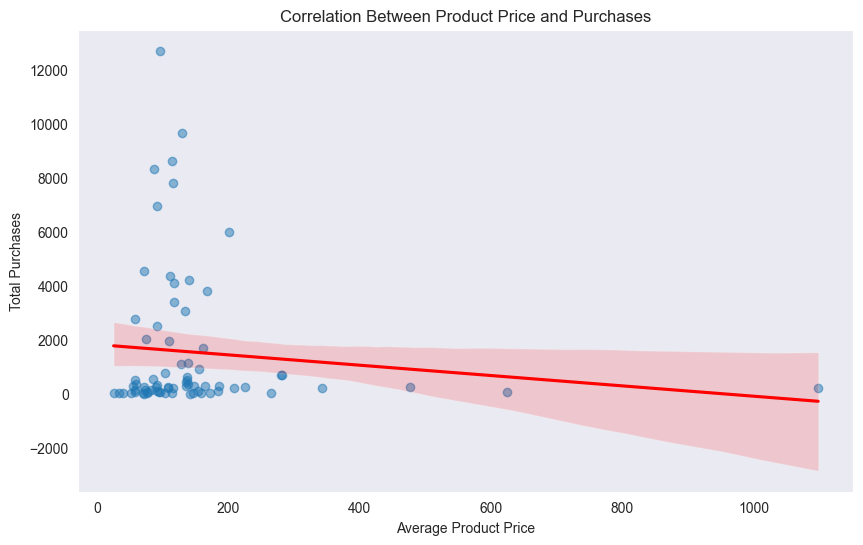

In [21]:
query = """SELECT LOWER(p.product_category) AS category, COUNT(oi.order_id) AS order_count, ROUND(AVG(oi.price),2) AS price
FROM products AS p
JOIN order_items AS oi ON p.product_id = oi.product_id
GROUP BY category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["category","order_count","price"])

df["order count"] = pd.to_numeric(df["order_count"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

correlation = df["price"].corr(df["order_count"])
print(f"Correlation between price and number of purchases: {correlation:.2f}")


plt.figure(figsize=(10,6))
sns.regplot(x="price", y="order_count", data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Average Product Price")
plt.ylabel("Total Purchases")
plt.title("Correlation Between Product Price and Purchases")
plt.show()


### CALCULATE THE TOAL REVENUE GENERATED BY EACH SELLER, AND RANK THEM BY REVENUE

seller_id       object
revenue        float64
seller_rank      int64
dtype: object


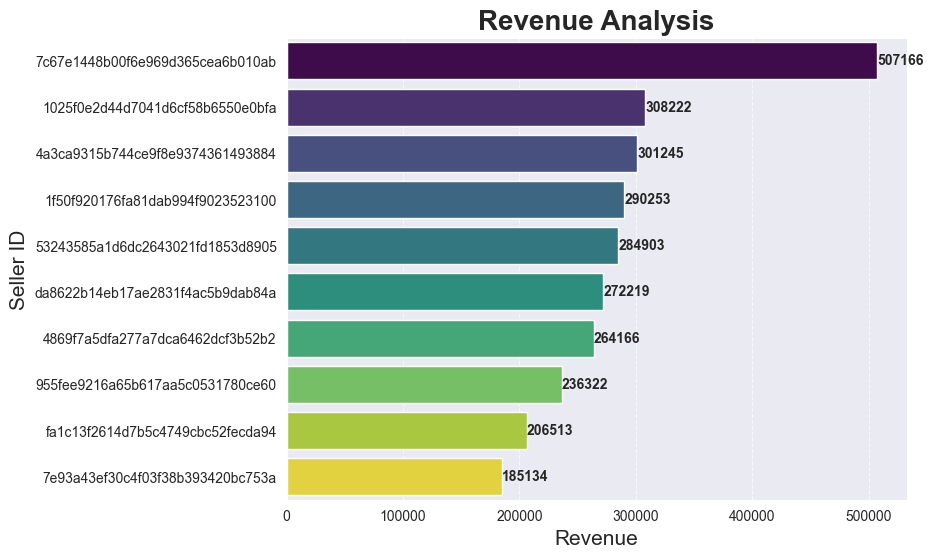

In [20]:
query = """SELECT seller_id, revenue,
       DENSE_RANK() OVER(ORDER BY revenue DESC) AS seller_rank
FROM (SELECT oi.seller_id, SUM(p.payment_value) AS revenue
FROM order_items AS oi
JOIN payments AS p ON oi.order_id = p.order_id
GROUP BY oi.seller_id) AS revenue_data
LIMIT 10;"""

cur.execute(query)

data = cur.fetchall()


df = pd.DataFrame(data, columns = ["seller_id","revenue","seller_rank"])

df["revenue"] = pd.to_numeric(df["revenue"])

print(df.dtypes)

plt.figure(figsize = (8,6))

sns.set_style("dark")

ax = sns.barplot(x = "revenue", y = "seller_id", data = df, hue = "seller_rank", orient = "h", palette = "viridis", legend= False)

for container in ax.containers:
    plt.bar_label(container, fmt = "%d", label_type= "edge", weight = "bold")

plt.xlabel("Revenue", fontsize = 15)
plt.ylabel("Seller ID", fontsize = 15)
plt.title("Revenue Analysis", fontsize = 20, fontweight = "bold")

plt.grid(axis = "x", linestyle = "--", alpha = 0.7)


plt.show()

### CALCULATE THE MOVING AVERAGE OF ORDER VALUES FOR EACH CUSTOMER OVER THEIR ORDER HISTORY

In [13]:
query = """SELECT customer, order_date,
	   ROUND(AVG(order_value) OVER(PARTITION BY customer ORDER BY order_date
                             ROWS BETWEEN 2 PRECEDING AND CURRENT ROW),2) AS moving_avg
FROM (SELECT o.customer_id AS customer, o.order_purchase_timestamp AS order_date, SUM(p.payment_value) AS order_value
FROM orders AS o
JOIN payments AS p ON o.order_id = p.order_id
GROUP BY customer, order_date) AS order_value_data;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["customer","order_date","moving_avg"])

print(df.head(10))



                           customer          order_date moving_avg
0  00012a2ce6f8dcda20d059ce98491703 2017-11-14 16:08:26     114.74
1  000161a058600d5901f007fab4c27140 2017-07-16 09:40:32      67.41
2  0001fd6190edaaf884bcaf3d49edf079 2017-02-28 11:06:43     195.42
3  0002414f95344307404f0ace7a26f1d5 2017-08-16 13:09:20     179.35
4  000379cdec625522490c315e70c7a9fb 2018-04-02 13:42:17     107.01
5  0004164d20a9e969af783496f3408652 2017-04-12 08:35:12      71.80
6  000419c5494106c306a97b5635748086 2018-03-02 17:47:40      49.40
7  00046a560d407e99b969756e0b10f282 2017-12-18 11:08:30     166.59
8  00050bf6e01e69d5c0fd612f1bcfb69c 2017-09-17 16:04:44      85.23
9  000598caf2ef4117407665ac33275130 2018-08-11 12:14:35    1255.71


### CALCULATE THE CUMULATIVE SALES PER MONTH FOR EACH YEAR

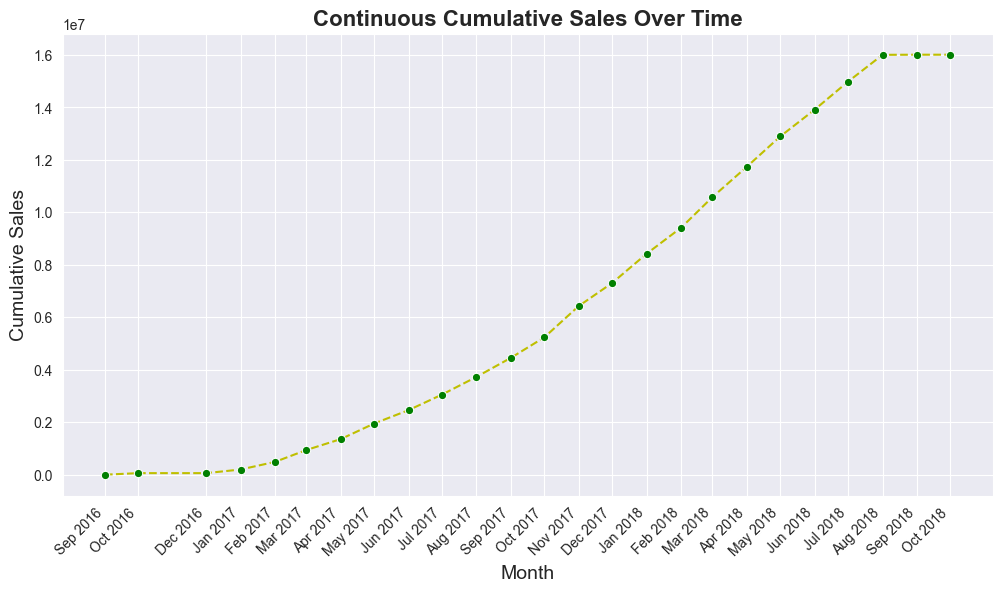

In [17]:
query = """SELECT year, month_name, 
       SUM(sales_value) OVER(ORDER BY year, month_number) AS cumulative_sum
FROM (SELECT YEAR(order_purchase_timestamp) AS year, MONTH(order_purchase_timestamp)as month_number,
	   MONTHNAME(order_purchase_timestamp) AS month_name, SUM(payment_value) AS sales_value
FROM orders AS o
JOIN payments AS p ON o.order_id = p.order_id
GROUP BY year,month_number,month_name
ORDER BY year, month_number,month_name) AS sales_value_data;"""


cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","month_name","cumulative_sales"])

df["cumulative_sales"] = pd.to_numeric(df["cumulative_sales"])

# Convert 'year' and 'month_name' into a proper datetime format
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month_name"], format="%Y-%B")

# Sort dataframe to maintain the correct order
df = df.sort_values("date")

# Create a new column for displaying 'Month Year' format
df["month_label"] = df["date"].dt.strftime("%b %Y")  # Example: 'Jan 2018', 'Feb 2018'


plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# Line plot with continuous trend
sns.lineplot(data=df, x="date", y="cumulative_sales", marker="o", color="y", markerfacecolor = "g", linestyle = "--")

# Format x-axis ticks to show only Month Names
plt.xticks(ticks=df["date"], labels=df["month_label"], rotation=45, ha="right")

# Labels and Title
plt.xlabel("Month", fontsize=14)
plt.ylabel("Cumulative Sales", fontsize=14)
plt.title("Continuous Cumulative Sales Over Time", fontsize=16, fontweight="bold")

plt.show()




### CALCULATE THE YEAR-OVER-YEAR GROWTH RATE OF TOTAL SALES

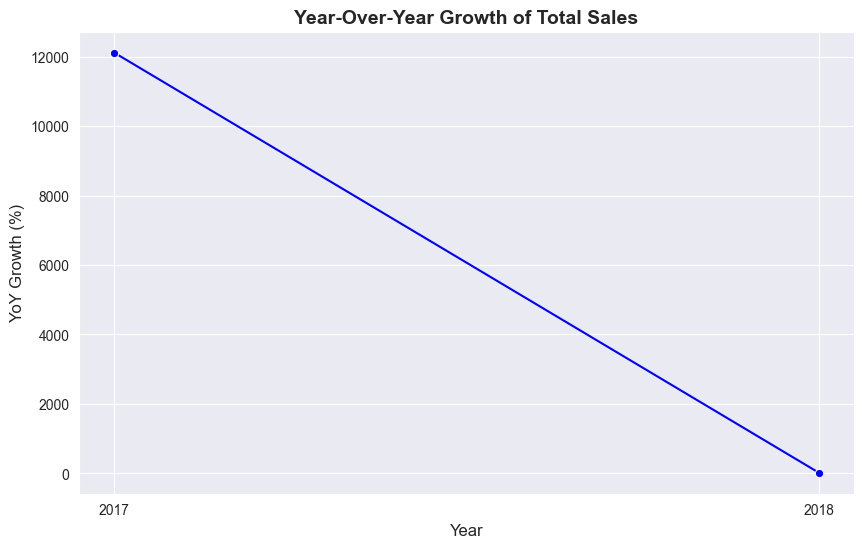

In [8]:
query = """SELECT year, 
		ROUND(((sales_value - LAG(sales_value) OVER(ORDER BY year))/ LAG(sales_value) OVER(ORDER BY year)) * 100,2) AS yoy_growth
 FROM(SELECT YEAR(o.order_purchase_timestamp) AS year, SUM(p.payment_value) AS sales_value
 FROM orders AS o
 JOIN payments AS p ON o.order_id = p.order_id
 GROUP BY year) AS sales_value_data;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","yoy_%_growth"])

 # Drop NULL values (first year will be NULL)
df.dropna(inplace=True) 

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

# Line plot for YoY Growth
sns.lineplot(data=df, x="year", y="yoy_%_growth", marker="o", color="b")

# Customize the plot
plt.xticks(df["year"])  # Show all years on x-axis
plt.xlabel("Year", fontsize=12)
plt.ylabel("YoY Growth (%)", fontsize=12)
plt.title("Year-Over-Year Growth of Total Sales", fontsize=14, fontweight="bold")

plt.show()


### CALCULATE THE RETENTION RATE OF CUSTOMERS, DEFINED AS THE PERCENTAGE OF OF CUSTOMER WHO MAKE ANOTHER PUCHASE WITHIN 6 MONTHS OF THEIR FIRST PURCHASE

In [7]:
query = """WITH first_order_customer AS 
(SELECT c.customer_id, MIN(o.order_purchase_timestamp) AS first_order
FROM customers AS c
JOIN orders AS o ON c.customer_id = o.customer_id
GROUP BY c.customer_id),

repeat_order_customer AS 
(SELECT o.customer_id
FROM orders AS o
JOIN first_order_customer AS f ON o.customer_id = f.customer_id
                           AND o.order_purchase_timestamp > f.first_order
                           AND o.order_purchase_timestamp <= DATE_ADD(f.first_order, INTERVAL 6 MONTH))

SELECT ROUND((COUNT(DISTINCT r.customer_id) / COUNT(DISTINCT f.customer_id)) * 100,2) AS retention_rate
FROM repeat_order_customer AS r
JOIN first_order_customer AS f ON r.customer_id = f.customer_id;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["retention_rate"])

print(df)

  retention_rate
0           None


### IDENTIFY THE TOP 3 CUSTOMERS WHO SPENT THE MOST MONEY IN EACH YEAR

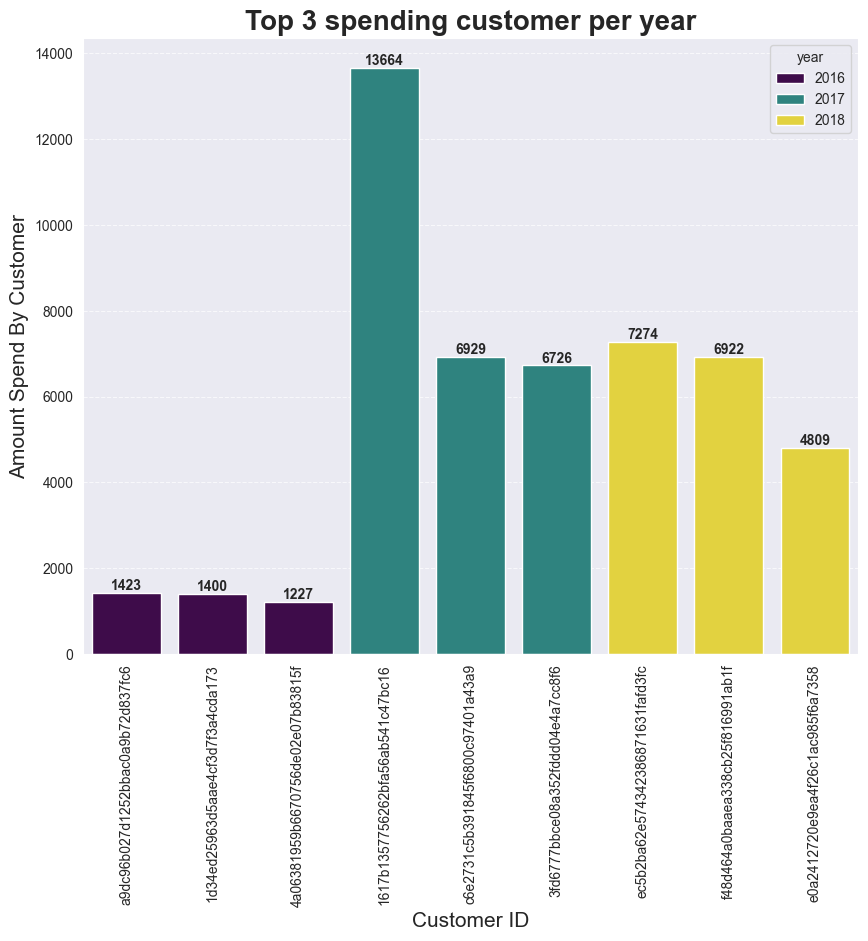

In [3]:
query = """WITH customer_rank_data AS (SELECT year, customer, amount_spent,
       DENSE_RANK() OVER(PARTITION BY year ORDER BY amount_spent DESC) AS customer_rank
FROM (SELECT YEAR(o.order_purchase_timestamp) AS year,o.customer_id AS customer, SUM(p.payment_value) AS amount_spent
FROM orders AS o
JOIN payments AS p ON o.order_id = p.order_id
GROUP BY year,o.customer_id
ORDER BY year) AS speding_data)

SELECT year, customer, amount_spent
FROM customer_rank_data
WHERE customer_rank <= 3;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year","customer","amount_spent"])

plt.figure(figsize = (10,8))

sns.set_style("dark")

ax = sns.barplot(data = df, x = "customer", y = "amount_spent", hue = "year", palette= "viridis")

for container in ax.containers:
    plt.bar_label(container, fmt = "%d", label_type= "edge", weight = "bold")

plt.xticks(rotation = 90)

plt.xlabel("Customer ID", fontsize = 15)
plt.ylabel("Amount Spend By Customer", fontsize = 15)
plt.title("Top 3 spending customer per year", fontsize = 20, fontweight = "bold")

plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

plt.show()

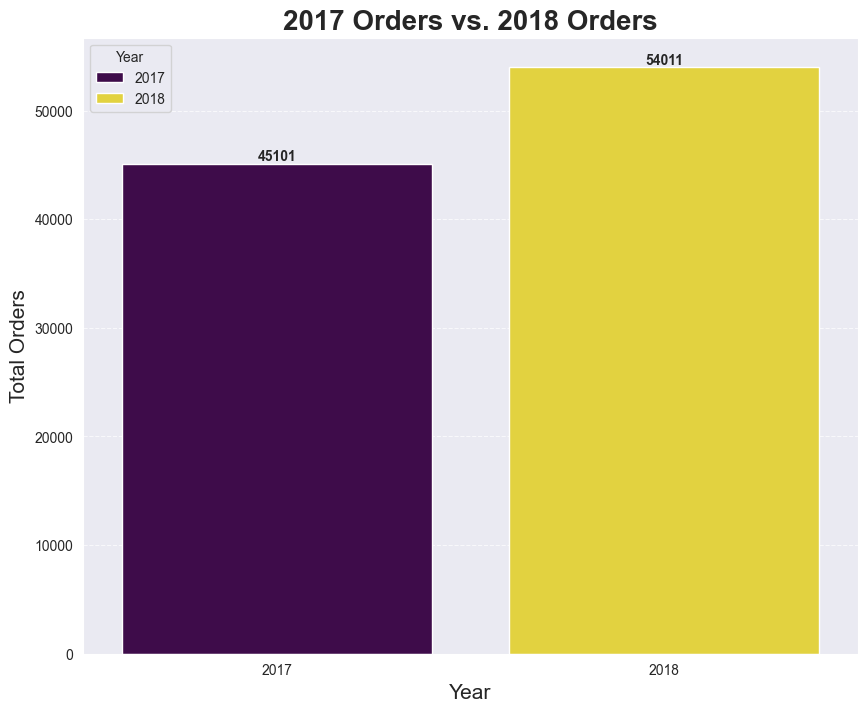

In [36]:
query = """WITH order_data AS (SELECT YEAR(order_purchase_timestamp) AS year, COUNT(*) AS total_orders
FROM orders
GROUP BY year)

SELECT year, total_orders
FROM order_data
WHERE year != 2016;"""


cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year", "total_orders"])

plt.figure(figsize= (10,8))

sns.set_style("dark")

ax = sns.barplot(data = df, x = "year", y = "total_orders", hue = "year", palette = "viridis")

for continter in ax.containers:
    plt.bar_label(continter, fmt = "%d", label_type = "edge", weight = "bold")

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Total Orders", fontsize = 15)
plt.title("2017 Orders vs. 2018 Orders", fontsize = 20, fontweight = "bold")
plt.legend(title = "Year", loc = "upper left")

plt.grid(axis= "y", linestyle = "--", alpha = 0.7)

plt.show()

